In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

Let's start by loading a local MOC and plotting it

In [2]:
from mocpy import MOC

m1 = MOC.from_fits('demo-data/P-SDSS9-r.fits')

Now, we load MOC for GALEX GR6 AIS FUV:

In [3]:
m2 = MOC.from_fits('demo-data/P-GALEXGR6-AIS-FUV.fits')

In [4]:
# Init a simple WCS
from hips import WCSGeometry
from astropy.coordinates import SkyCoord

41.43579527340836 241.09406994180694 46.282837578271426 60.28040654890779


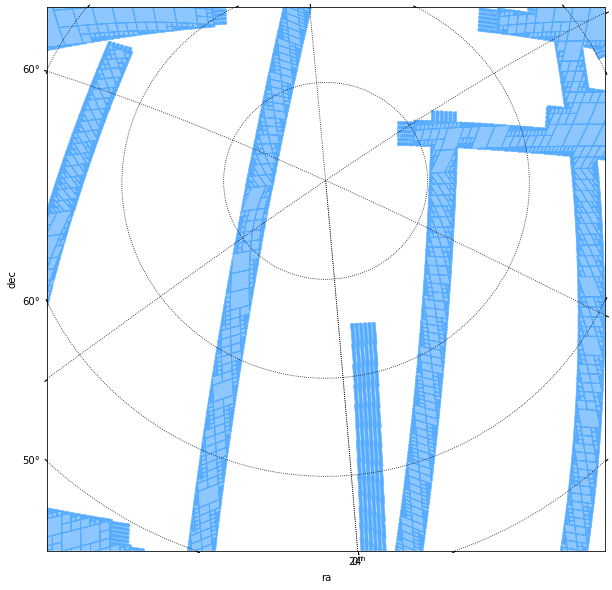

In [46]:
fig = plt.figure(111, figsize=(10, 10))
# Get the size of the figure in pixels
width_px, height_px = fig.get_size_inches()*fig.dpi

geometry = WCSGeometry.create(
 skydir=SkyCoord(5, 80, unit='deg', frame='icrs'),
 width=width_px, height=height_px, fov="50 deg",
 coordsys='icrs', projection='AIT')
wcs = geometry.wcs
ax = fig.add_subplot(1, 1, 1, projection=wcs)

# Compute the bounding box vertices
import numpy as np
res = wcs.all_pix2world(np.array([0, width_px-1]) , np.array([0, height_px-1]), 0)
min_lon = np.nanmin(res[0])
max_lon = np.nanmax(res[0])
min_lat = np.nanmin(res[1])
max_lat = np.nanmax(res[1])

print(min_lon, max_lon, min_lat, max_lat)

#c1 = wcs.wcs.crval + wcs.wcs.crpix * wcs.wcs.cdelt
#c2 = wcs.wcs.crval - wcs.wcs.crpix * wcs.wcs.cdelt
# Add all the MOC to the view

m1.fill(ax=ax, wcs=wcs, lon1=min_lon*u.deg, lat1=min_lat*u.deg, lon2=max_lon*u.deg, lat2=max_lat*u.deg, alpha=0.5, fill=True, color="dodgerblue")
#m1.fill(ax=ax, wcs=wcs,  alpha=0.5, fill=True, color="dodgerblue")

#plt.axis('equal')

#moc.border(ax=ax, wcs=wcs, color='black')

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

In [36]:
import numpy as np
res = wcs.all_pix2world(np.arange(0, width_px) , np.arange(0, height_px), 0)
min_lon = np.nanmin(res[0])
max_lon = np.nanmax(res[0])
min_lat = np.nanmin(res[1])
max_lat = np.nanmax(res[1])
min_lon, max_lon
min_lat, max_lat

(-30.391978029185687, 19.547017147165487)

We can compute the intersection between the 2 MOC:

In [ ]:
m_intersect = m1.intersection(m2)

plot(mocs=[m_intersect], wcs=wcs_icrs, colors=['g'], title="P-GALEXGR6-AIS-FUV inter P-SDSS9-r")

And serialize it to FITS (official serialization):

In [ ]:
hdulist = m_intersect.serialize(format='json')
hdulist

MOC can also be serialized in JSON:
```python
m_intersect.write(format='json')
```

Or write it directly to a FITS/JSON file:
```python
m_intersect.write(path=<filename>, write_to_file=True, format='json'/'fits')
```